Name : Ilham Muhamad Firdaus    
Student ID : 1103202001

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = "Salary_Data.csv"
df = pd.read_csv(dataset)
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
# Data
X = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary'].values

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Inisialisasi model SVR dengan hyperparameter tertentu
svr_model = SVR(C=1000, gamma=0.05, kernel='rbf')

# Melatih model
svr_model.fit(X_train, y_train)

# Melakukan prediksi pada set pengujian
y_pred = svr_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 691072575.6522789


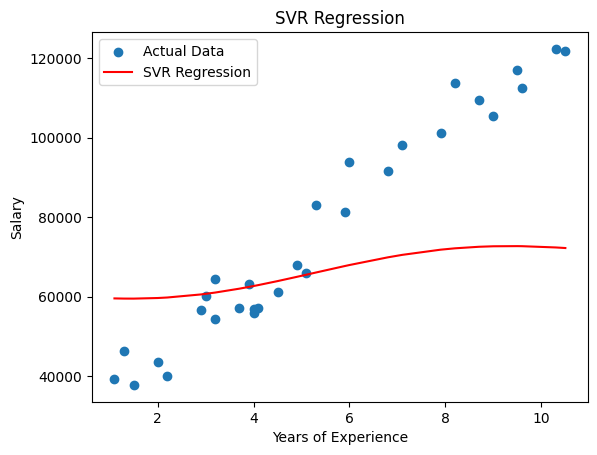

In [6]:
# Memvisualisasikan model
plt.scatter(X, y, label='Actual Data')
plt.plot(X, svr_model.predict(X), color='red', label='SVR Regression')

# Label sumbu
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Menambahkan judul
plt.title('SVR Regression')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()

In [7]:
# Tentukan hyperparameter yang akan diuji
param_grid = {
    'kernel': ['rbf'],
    'C': [1000, 10000, 100000],
    'gamma': [0.5, 0.05, 0.005]
}

# Gunakan GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(svr_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Gunakan model terbaik untuk membuat prediksi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Best Parameters: {'C': 100000, 'gamma': 0.5, 'kernel': 'rbf'}
Mean Squared Error on Test Set: 53670424.352822624


In [8]:
model_baru = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X,y)

SVR(C=100000, gamma=0.005)

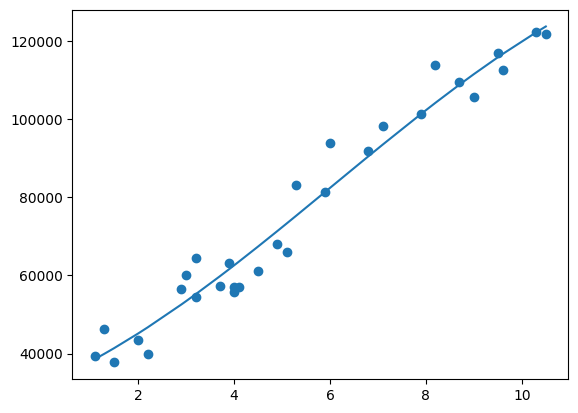

In [9]:
#visualisasikan model
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model_baru.predict(X))